In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import (
    f1_score, precision_score, recall_score, accuracy_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
)
from scipy.optimize import linear_sum_assignment

In [17]:
data = pd.read_csv("/home/bhawesh/Programming/Capstone Project/Dataset/gallstone_.csv")
data.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


Initially we would try working with full dataset then we will work on featured engineered dataset

In [18]:
df = data.copy()

In [19]:
X = df.drop("Gallstone Status", axis = 1)
y = df["Gallstone Status"]

In [20]:
cols = [
 'Height',
 'Weight',
 'Body Mass Index (BMI)',
 'Total Body Water (TBW)',
 'Extracellular Water (ECW)',
 'Intracellular Water (ICW)',
 'Extracellular Fluid/Total Body Water (ECF/TBW)',
 'Total Body Fat Ratio (TBFR) (%)',
 'Lean Mass (LM) (%)',
 'Body Protein Content (Protein) (%)',
 'Visceral Fat Rating (VFR)',
 'Bone Mass (BM)',
 'Muscle Mass (MM)',
 'Obesity (%)',
 'Total Fat Content (TFC)',
 'Visceral Fat Area (VFA)',
 'Visceral Muscle Area (VMA) (Kg)',
 'Hepatic Fat Accumulation (HFA)',
 'Glucose',
 'Total Cholesterol (TC)',
 'Low Density Lipoprotein (LDL)',
 'High Density Lipoprotein (HDL)',
 'Triglyceride',
 'Aspartat Aminotransferaz (AST)',
 'Alanin Aminotransferaz (ALT)',
 'Alkaline Phosphatase (ALP)',
 'Creatinine',
 'Glomerular Filtration Rate (GFR)',
 'C-Reactive Protein (CRP)',
 'Hemoglobin (HGB)',
 'Vitamin D']

In [25]:
cols2 = [
    "Age",
    "Gender",
    "Comorbidity",
    "Coronary Artery Disease (CAD)",
    "Hypothyroidism",
    "Hyperlipidemia",
    "Diabetes Mellitus (DM)"
]

In [21]:
ms = MinMaxScaler()
x = ms.fit_transform(X[cols])

In [23]:
x = pd.DataFrame(x, columns= cols)
x.head()

,Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0.869565,0.496024,0.300310,0.750000,0.648936,0.413395,0.472991,0.289108,0.712847,0.691948,...,0.060484,0.158509,0.064171,0.051491,0.421053,0.36,0.839127,0.0,0.728155,0.594758
1,0.673913,0.512922,0.405573,0.565789,0.558511,0.226328,0.692578,0.593904,0.407565,0.577662,...,0.072581,0.121454,0.032086,0.027100,0.205263,0.41,0.794893,0.0,0.572816,0.433468
2,0.565217,0.479125,0.427245,0.642857,0.590426,0.307159,0.604743,0.470641,0.529991,0.560519,...,0.072581,0.080814,0.053476,0.029810,0.310526,0.79,0.452306,0.0,0.747573,0.538306
3,0.500000,0.246521,0.204334,0.533835,0.425532,0.244804,0.516908,0.212909,0.787825,0.589091,...,0.137097,0.061689,0.064171,0.024390,0.142105,0.56,0.687809,0.0,0.669903,0.643145
4,0.717391,0.464215,0.337461,0.721805,0.585106,0.406467,0.429073,0.307037,0.694494,0.584416,...,0.020161,0.388006,0.101604,0.138211,0.336842,0.36,0.839127,0.0,0.805825,0.747984


In [26]:
X = pd.concat([X[cols2] , x], axis = 1)
X.head()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,50,0,0,0,0,0,0,0.869565,0.496024,0.300310,...,0.060484,0.158509,0.064171,0.051491,0.421053,0.36,0.839127,0.0,0.728155,0.594758
1,47,0,1,0,0,0,0,0.673913,0.512922,0.405573,...,0.072581,0.121454,0.032086,0.027100,0.205263,0.41,0.794893,0.0,0.572816,0.433468
2,61,0,0,0,0,0,0,0.565217,0.479125,0.427245,...,0.072581,0.080814,0.053476,0.029810,0.310526,0.79,0.452306,0.0,0.747573,0.538306
3,41,0,0,0,0,0,0,0.500000,0.246521,0.204334,...,0.137097,0.061689,0.064171,0.024390,0.142105,0.56,0.687809,0.0,0.669903,0.643145
4,42,0,0,0,0,0,0,0.717391,0.464215,0.337461,...,0.020161,0.388006,0.101604,0.138211,0.336842,0.36,0.839127,0.0,0.805825,0.747984


In [27]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [28]:
kmeans.cluster_centers_

array([[5.68857143e+01, 5.25714286e-01, 5.08571429e-01, 6.28571429e-02,
        4.00000000e-02, 3.42857143e-02, 2.22857143e-01, 4.30310559e-01,
        3.90105084e-01, 3.97877046e-01, 5.13469388e-01, 4.35866261e-01,
        2.11864071e-01, 6.06233766e-01, 5.39973106e-01, 4.58970457e-01,
        5.39205937e-01, 3.33142857e-01, 5.33296703e-01, 6.63774822e-01,
        2.26779279e-02, 3.79547860e-01, 3.05628785e-01, 5.12063724e-01,
        3.38571429e-01, 9.35200452e-02, 4.97571429e-01, 4.21458967e-01,
        1.05822581e-01, 1.73277871e-01, 6.92131398e-02, 6.10917538e-02,
        3.62884211e-01, 3.46771429e-01, 6.91104323e-01, 4.35648453e-02,
        5.69070735e-01, 3.70507790e-01],
       [3.73541667e+01, 4.51388889e-01, 1.25000000e-01, 6.94444444e-03,
        1.38888889e-02, 1.38888889e-02, 2.77777778e-02, 5.44082126e-01,
        3.55319472e-01, 3.03620571e-01, 5.24762427e-01, 4.21357861e-01,
        2.45669746e-01, 5.26271166e-01, 4.34788834e-01, 5.65145355e-01,
        5.39101732e-01,

In [29]:
kmeans.inertia_

16975.871676990948

In [30]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 155 out of 319 samples were correctly labeled.


In [31]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.49


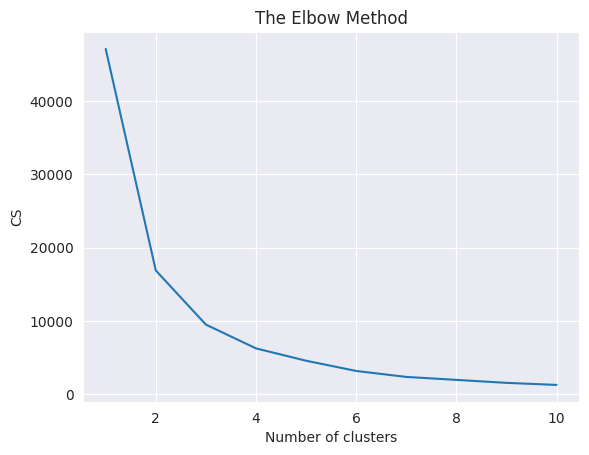

In [32]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=2,random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 155 out of 319 samples were correctly labeled.
Accuracy score: 0.49


In [46]:
df2 = data.copy()

In [48]:
df2['BMI_CRP_Product'] = df2['Body Mass Index (BMI)'] * df2['C-Reactive Protein (CRP)']
df2['BMI_CRP_Product'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: BMI_CRP_Product, dtype: float64

In [49]:
df2['Muscle_Fat_Ratio'] = df2['Muscle Mass (MM)'] / df2['Total Fat Content (TFC)']
df2['Muscle_Fat_Ratio'].head()

0    4.011236
1    1.945161
2    2.526104
3    5.056075
4    3.810056
Name: Muscle_Fat_Ratio, dtype: float64

In [51]:
feature_cols = ['Gallstone Status',
 'Age',
 'Gender',
 'Comorbidity',
 'Coronary Artery Disease (CAD)',
 'Hypothyroidism',
 'Hyperlipidemia',
 'Diabetes Mellitus (DM)',
 'Height',
 'Weight',
 'Body Mass Index (BMI)',
 'Total Body Water (TBW)',
 'Total Fat Content (TFC)',
 'Visceral Fat Area (VFA)',
 'Glucose',
 'Total Cholesterol (TC)',
 'Low Density Lipoprotein (LDL)',
 'High Density Lipoprotein (HDL)',
 'Triglyceride',
 'Aspartat Aminotransferaz (AST)',
 'C-Reactive Protein (CRP)',
 'Vitamin D',
 'BMI_CRP_Product',
 'Muscle_Fat_Ratio']

In [52]:
X = df2[feature_cols].drop("Gallstone Status", axis = 1)
y = df2["Gallstone Status"]

In [53]:
ns = MinMaxScaler()
x = ns.fit_transform(X[['Height',
 'Weight',
 'Body Mass Index (BMI)',
 'Total Body Water (TBW)',
 'Total Fat Content (TFC)',
 'Visceral Fat Area (VFA)',
 'Glucose',
 'Total Cholesterol (TC)',
 'Low Density Lipoprotein (LDL)',
 'High Density Lipoprotein (HDL)',
 'Triglyceride',
 'Aspartat Aminotransferaz (AST)',
 'C-Reactive Protein (CRP)',
 'Vitamin D',
 'BMI_CRP_Product',
 'Muscle_Fat_Ratio']])

In [54]:
x = pd.DataFrame(x, columns= ['Height',
 'Weight',
 'Body Mass Index (BMI)',
 'Total Body Water (TBW)',
 'Total Fat Content (TFC)',
 'Visceral Fat Area (VFA)',
 'Glucose',
 'Total Cholesterol (TC)',
 'Low Density Lipoprotein (LDL)',
 'High Density Lipoprotein (HDL)',
 'Triglyceride',
 'Aspartat Aminotransferaz (AST)',
 'C-Reactive Protein (CRP)',
 'Vitamin D',
 'BMI_CRP_Product',
 'Muscle_Fat_Ratio'])

In [55]:
X = pd.concat([X[cols2], x], axis=1)
X.head()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),C-Reactive Protein (CRP),Vitamin D,BMI_CRP_Product,Muscle_Fat_Ratio
0,50,0,0,0,0,0,0,0.869565,0.496024,0.300310,...,0.065217,0.633333,0.581560,0.060484,0.158509,0.064171,0.0,0.594758,0.0,0.277484
1,47,0,1,0,0,0,0,0.673913,0.512922,0.405573,...,0.049407,0.373333,0.343972,0.072581,0.121454,0.032086,0.0,0.433468,0.0,0.128520
2,61,0,0,0,0,0,0,0.565217,0.479125,0.427245,...,0.067194,0.396667,0.400709,0.072581,0.080814,0.053476,0.0,0.538306,0.0,0.170406
3,41,0,0,0,0,0,0,0.500000,0.246521,0.204334,...,0.000000,0.376667,0.219858,0.137097,0.061689,0.064171,0.0,0.643145,0.0,0.352817
4,42,0,0,0,0,0,0,0.717391,0.464215,0.337461,...,0.079051,0.483333,0.507092,0.020161,0.388006,0.101604,0.0,0.747984,0.0,0.262979


In [56]:
kmeans = KMeans(n_clusters=2,random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 155 out of 319 samples were correctly labeled.
Accuracy score: 0.49


In [43]:
def evaluate_kmeans(y_true, y_pred, model_name="KMeans", csv_path="model_metrics.csv", plot=True):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from sklearn.metrics import (
        f1_score, precision_score, recall_score, accuracy_score,
        roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
    )
    from scipy.optimize import linear_sum_assignment
    import os

    # Ensure DataFrame for column-wise operations
    if isinstance(y_true, np.ndarray):
        y_true = pd.DataFrame(y_true)
    elif not isinstance(y_true, pd.DataFrame):
        y_true = pd.DataFrame(np.array(y_true))

    metrics_list = []

    # Loop over each target column
    for col in y_true.columns:
        y_col = y_true[col].values

        # Hungarian mapping for correct label alignment
        labels = np.unique(y_pred)
        cost_matrix = np.zeros((len(labels), len(labels)))
        for i in range(len(labels)):
            for j in range(len(labels)):
                cost_matrix[i, j] = -np.sum((y_pred == labels[i]) & (y_col == labels[j]))
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        mapping = {labels[row]: col for row, col in zip(row_ind, col_ind)}
        mapped_preds = np.array([mapping[label] for label in y_pred])

        # Metrics for this column
        col_metrics = {
            "model_name": model_name,
            "target_column": col,
            "accuracy": accuracy_score(y_col, mapped_preds),
            "precision_macro": precision_score(y_col, mapped_preds, average='macro', zero_division=0),
            "recall_macro": recall_score(y_col, mapped_preds, average='macro', zero_division=0),
            "f1_macro": f1_score(y_col, mapped_preds, average='macro', zero_division=0),
            "precision_micro": precision_score(y_col, mapped_preds, average='micro', zero_division=0),
            "recall_micro": recall_score(y_col, mapped_preds, average='micro', zero_division=0),
            "f1_micro": f1_score(y_col, mapped_preds, average='micro', zero_division=0),
            "precision_weighted": precision_score(y_col, mapped_preds, average='weighted', zero_division=0),
            "recall_weighted": recall_score(y_col, mapped_preds, average='weighted', zero_division=0),
            "f1_weighted": f1_score(y_col, mapped_preds, average='weighted', zero_division=0)
        }

        # Per-class F1
        f1_per_class = dict(zip(np.unique(y_col), f1_score(y_col, mapped_preds, average=None, zero_division=0)))
        for cls, val in f1_per_class.items():
            col_metrics[f"f1_class_{cls}"] = val

        # AUC
        try:
            col_metrics["roc_auc_macro"] = roc_auc_score(y_col, mapped_preds, average="macro", multi_class='ovo')
            col_metrics["roc_auc_weighted"] = roc_auc_score(y_col, mapped_preds, average="weighted", multi_class='ovo')
        except ValueError:
            col_metrics["roc_auc_macro"] = None
            col_metrics["roc_auc_weighted"] = None

        metrics_list.append(col_metrics)

        # Print report
        print(f"\nClassification Report for '{col}':\n", classification_report(y_col, mapped_preds, zero_division=0))

        if plot:
            # Confusion Matrix
            cm = confusion_matrix(y_col, mapped_preds)
            plt.figure(figsize=(6, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {col}')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

            # ROC Curve (binary only)
            if len(np.unique(y_col)) == 2:
                fpr, tpr, _ = roc_curve(y_col, mapped_preds)
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - {col}')
                plt.legend(loc='lower right')
                plt.show()

    # Save to CSV (append if exists)
    metrics_df = pd.DataFrame(metrics_list)
    if os.path.exists(csv_path):
        metrics_df.to_csv(csv_path, mode='a', index=False, header=False)
    else:
        metrics_df.to_csv(csv_path, index=False)

    print(f"\nMetrics saved to: {csv_path}")

    return metrics_df



Classification Report for '0':
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       161
           1       0.51      0.56      0.53       158

    accuracy                           0.51       319
   macro avg       0.51      0.51      0.51       319
weighted avg       0.51      0.51      0.51       319



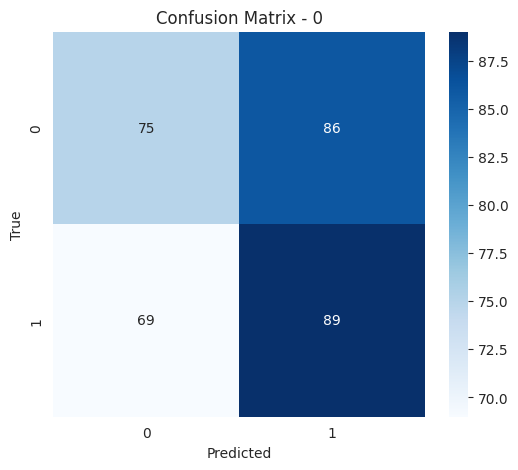

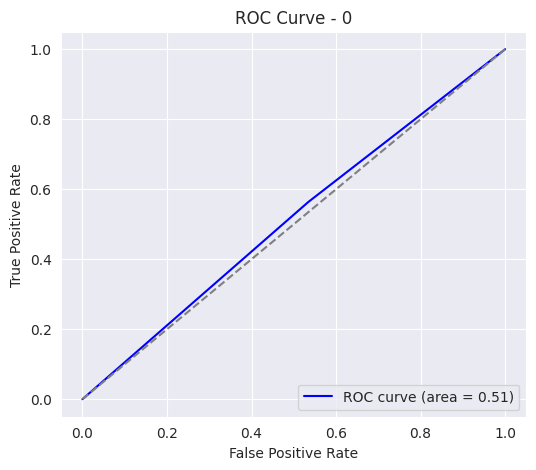


Metrics saved to: model_metrics.csv
  model_name  target_column  accuracy  precision_macro  recall_macro  \
0  KMeans_v2              0  0.514107         0.514702      0.514565   

   f1_macro  precision_micro  recall_micro  f1_micro  precision_weighted  \
0  0.513169         0.514107      0.514107  0.514107             0.51476   

   recall_weighted  f1_weighted  f1_class_0  f1_class_1  roc_auc_macro  \
0         0.514107     0.512968    0.491803    0.534535       0.514565   

   roc_auc_weighted  
0          0.514565  


In [57]:
labels = kmeans.labels_
metrics_df = evaluate_kmeans(y, labels, model_name="KMeans_v2")
print(metrics_df)